In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Load datasets
customers = pd.read_csv(r"C:\Users\kshitij pratap tomer\OneDrive\Desktop\Customers (1).csv")
transactions = pd.read_csv(r"C:\Users\kshitij pratap tomer\OneDrive\Desktop\Transactions.csv")

In [3]:
# Data Preparation
# Merge Customers and Transactions data
data = pd.merge(transactions, customers, on="CustomerID", how="inner")


In [4]:
# Grouping by CustomerID to aggregate transaction data
customer_agg = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "TransactionID": "count"
}).rename(columns={
    "TotalValue": "TotalSpent",
    "TransactionID": "TransactionCount"
}).reset_index()


In [5]:
# Adding customer profile data (region, signup date)
customer_profile = customers[["CustomerID", "Region", "SignupDate"]]
customer_agg = pd.merge(customer_agg, customer_profile, on="CustomerID", how="inner")

In [6]:
# Encoding categorical variables (e.g., Region)
customer_agg["Region"] = customer_agg["Region"].astype("category").cat.codes

# Feature selection for clustering
features = customer_agg[["TotalSpent", "Quantity", "TransactionCount", "Region"]]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [7]:
# Clustering with K-Means
# Choose number of clusters between 2 and 10
num_clusters = 5  # You can adjust this based on analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters back to the original data
customer_agg["Cluster"] = clusters

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.000518628183939


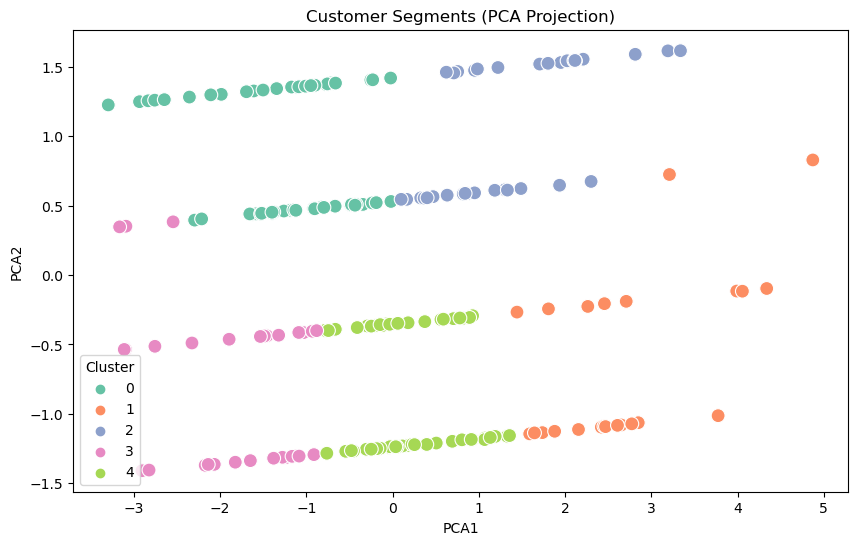

Number of clusters: 5
Davies-Bouldin Index: 1.000518628183939
Cluster Sizes:
4    56
0    53
2    36
3    31
1    23
Name: Cluster, dtype: int64


In [8]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_agg["PCA1"] = pca_features[:, 0]
customer_agg["PCA2"] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=customer_agg, palette="Set2", s=100)
plt.title("Customer Segments (PCA Projection)")
plt.show()

# Cluster Metrics and Visualization
print(f"Number of clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
cluster_sizes = customer_agg["Cluster"].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Save the results
customer_agg.to_csv("Customer_Segmentation_Results.csv", index=False)